In [1]:
# pip install -r /config/workspace/requirements.txt

In [1]:
import tensorflow as tf
from tensorflow import  keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## testing the configeration of the system

In [3]:
tf.config.experimental.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.__version__

'2.14.0'

In [6]:
tf.test.is_built_with_cuda()

True

In [7]:
## Loading the dataset

In [8]:
data_1=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [9]:
data_2=tf.keras.datasets.cifar100.load_data()

169001437/169001437 [==============================] - 8s 0us/step


In [10]:
type(data_1),type(data_1[0]),type(data_1[0][0])

(tuple, tuple, numpy.ndarray)

In [11]:
(x_train,y_train),(x_test,y_test)=data_1

In [12]:
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [13]:
## Data visualization
## Defining the function for diaplaying the image
def plot_image(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])

(None, None)

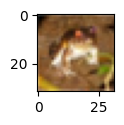

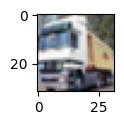

In [14]:
plot_image(0),plot_image(1)

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [16]:
len(y_train[0]),type(y_train[0]),type(y_train[0][0]),y_train[0][0]

(1, numpy.ndarray, numpy.uint8, 6)

In [17]:
classes[y_train[0][0]]

'frog'

In [18]:
y_train[:5],y_test[:5].shape,type(y_test[:5])

(array([[6],
        [9],
        [9],
        [4],
        [1]], dtype=uint8),
 (5, 1),
 numpy.ndarray)

In [19]:
y_test.shape,x_test.shape

((10000, 1), (10000, 32, 32, 3))

In [20]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [21]:
np.max(x_test),np.min(x_test)

(255, 0)

In [22]:
## PREPROCESSING : scales the images
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [23]:
## Encoding the attributes to one hot encoding scheme
# we need to just encode the output lables
y_train_cat = keras.utils.to_categorical(
    y_train,num_classes=10,dtype='float32'
)

y_test_cat=keras.utils.to_categorical(
    y_test,num_classes=10,dtype='float32'
)

In [24]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [25]:
y_train_cat[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
## Building the model and traning the model
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_scaled,y_train_cat,epochs=1)

1563/1563 [==============================] - 13s 5ms/step - loss: 1.8154 - accuracy: 0.3537


In [27]:
model.predict(x_test_scaled)[0]

313/313 [==============================] - 1s 2ms/step


array([0.39227536, 0.5281331 , 0.6293205 , 0.7505252 , 0.5412495 ,
       0.6769048 , 0.53507864, 0.19790119, 0.4839984 , 0.14343128],
      dtype=float32)

In [28]:
## making the prediction
np.argmax(model.predict(x_test_scaled)[0])

313/313 [==============================] - 1s 3ms/step


3

In [29]:
len(model.predict(x_test_scaled))

313/313 [==============================] - 1s 3ms/step


10000

In [30]:
model.predict(x_test_scaled).shape

313/313 [==============================] - 1s 3ms/step


(10000, 10)

In [31]:
## we are making the predictions for all the 10000 test data sets
## to know the predictions for the ith data point model.predict(x_test_scaled)[i]

x_test_scaled.shape

(10000, 32, 32, 3)

In [32]:
y_test[0][0]

3

In [33]:
## defining a function for creating a model
def get_model():
    model=keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000,activation='relu'),
        keras.layers.Dense(1000,activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ])

    model.compile(
        optimizer='SGD',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [34]:
k1=get_model()

In [35]:
## import timeit

In [36]:
%%timeit
with tf.device('/CPU:0'):
  cpu_model=get_model()
  cpu_model.fit(x_train_scaled,y_train_cat,epochs=1)

1563/1563 [==============================] - 129s 82ms/step - loss: 1.8116 - accuracy: 0.3570
2min 49s ± 30.4 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
## Measuring the running time on the CPU

## IF we dont mention these arguments then the cell will execute the code multiple time and will take the average time of the execution of the ode
## these argumenst will lemit the execution of code to once
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model=get_model()
  cpu_model.fit(x_train_scaled,y_train_cat,epochs=1)

1563/1563 [==============================] - 119s 76ms/step - loss: 1.8130 - accuracy: 0.3534
2min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [44]:
## Measuring the running time on the GPU MACHINE

%%timeit -n1 -r1
with tf.device('/GPU:0'):
  gpu_model=get_model()
  gpu_model.fit(x_train_scaled,y_train_cat,epochs=1)

1563/1563 [==============================] - 9s 5ms/step - loss: 1.8131 - accuracy: 0.3538
12.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [45]:
## running the code for multiple epochs

%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model=get_model()
  cpu_model.fit(x_train_scaled,y_train_cat,epochs=25)

Epoch 1/25
1563/1563 [==============================] - 121s 77ms/step - loss: 1.8139 - accuracy: 0.3547
Epoch 2/25
1563/1563 [==============================] - 121s 78ms/step - loss: 1.6243 - accuracy: 0.4266
Epoch 3/25
1563/1563 [==============================] - 120s 77ms/step - loss: 1.5419 - accuracy: 0.4570
Epoch 4/25
1563/1563 [==============================] - 120s 77ms/step - loss: 1.4843 - accuracy: 0.4770
Epoch 5/25
1563/1563 [==============================] - 120s 77ms/step - loss: 1.4344 - accuracy: 0.4958
Epoch 6/25
1563/1563 [==============================] - 121s 77ms/step - loss: 1.3908 - accuracy: 0.5114
Epoch 7/25
1563/1563 [==============================] - 119s 76ms/step - loss: 1.3534 - accuracy: 0.5228
Epoch 8/25
1563/1563 [==============================] - 122s 78ms/step - loss: 1.3186 - accuracy: 0.5386
Epoch 9/25
1563/1563 [==============================] - 121s 77ms/step - loss: 1.2853 - accuracy: 0.5499
Epoch 10/25
1563/1563 [==============================] 

In [46]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  gpu_model=get_model()
  gpu_model.fit(x_train_scaled,y_train_cat,epochs=25)

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8114 - accuracy: 0.3544
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6214 - accuracy: 0.4272
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5420 - accuracy: 0.4557
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4808 - accuracy: 0.4795
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4318 - accuracy: 0.4983
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3883 - accuracy: 0.5114
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3515 - accuracy: 0.5263
Epoch 8/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3155 - accuracy: 0.5386
Epoch 9/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2816 - accuracy: 0.5509
Epoch 10/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.253

##### Here is the performance comparison for 1 epoch,

| Epoch | CPU | GPU |
|-------|-----|-----|
|   1   | 2min 23s  | 12.5 s|
|  25   |50min 23s |3min 24s |

You can see that GPU is almost 15 times faster. We ran only one epoch for benchmarking but for actual training we have to run many epochs and also when data volume is big running deep learning without GPU can consume so much time. This is the reason why GPUs are becoming popular in the field of deep learning